# Class 3 Notebook – Logistic Regression (Classification Basics)

This notebook introduces **Logistic Regression** as a first classification algorithm.

We’ll mirror the steps from the *Logistic_Regression_demo1* slides using a tiny example. If you have not already walked through the **Class 3 Linear Regression** notebook (`class-3-linear-regression-basics.ipynb`), start there first – the pattern is the same, just with a regression target instead of a classification label.

- **Objective**: Predict whether a student **passes or fails** based on **study hours**.
- **Model type**: Logistic Regression (binary classification).
- **Key idea**: The model outputs a **probability between 0 and 1**, then we turn that into a class (0 = Fail, 1 = Pass).

We’ll follow the same 10‑step supervised‑learning pattern you saw in Class 3:

1. Define the objective
2. Install / import libraries
3. Create a small dataset
4. Separate features and target
5. Train/test split
6. Create the model
7. Train the model
8. Make predictions
9. Evaluate the model
10. (Optional) Visualize and interpret

Run the next cell to make sure your environment works and the right libraries are installed.

## Run in the browser (no local setup)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/adzuci/ai-fundamentals/blob/class-3/class-3-machine-learning-deep-learning-basics/class-3-logistic-regression-basics.ipynb)

> Tip: Make sure you’ve already walked through the **Class 2** notebooks and the **Class 3 Linear Regression** notebook (`class-3-linear-regression-basics.ipynb`) before this one.

In [14]:
# Environment sanity check + core classification libraries
import platform

print("Python:", platform.python_version())
print("OS:", platform.system(), platform.release())

try:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

    print("NumPy:", np.__version__, "| Pandas:", pd.__version__)
except ModuleNotFoundError as exc:
    print("Missing dependency:", exc)
    print("Install with: python -m pip install numpy pandas matplotlib scikit-learn")
    raise

Python: 3.10.14
OS: Darwin 25.2.0
NumPy: 2.2.6 | Pandas: 2.3.3


In [15]:
# 5. Separate feature and target for study-hours example
# X_cls: study hours (2D matrix with one column)
# y_cls: pass/fail label (1D vector)
X_cls = mydata[["StudyHours"]]
y_cls = mydata["Result"]

X_cls, y_cls

(   StudyHours
 0           1
 1           2
 2           3
 3           4
 4           5
 5           6
 6           7
 7           8
 8           9
 9          10,
 0    0
 1    0
 2    0
 3    0
 4    0
 5    1
 6    1
 7    1
 8    1
 9    1
 Name: Result, dtype: int64)

In [16]:
# Step 1–4: Create a tiny dataset of study hours and pass/fail labels
# (0 = Fail, 1 = Pass)

# Study hours for 10 students
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Result: 0 = Fail, 1 = Pass (this is our label)
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

mydata = pd.DataFrame({
    "StudyHours": X,
    "Result": y,
})

mydata

,StudyHours,Result
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,1
6,7,1
7,8,1
8,9,1
9,10,1


In [17]:
# 9. Make predictions on the test set
y_pred_cls = log_reg.predict(X_test_cls)

print("Actual labels:   ", list(y_test_cls))
print("Predicted labels:", list(y_pred_cls))

Actual labels:    [1, 0]
Predicted labels: [np.int64(1), np.int64(0)]


In [18]:
# 10. Evaluate the classification model
acc_cls = accuracy_score(y_test_cls, y_pred_cls)
cm_cls = confusion_matrix(y_test_cls, y_pred_cls)
report_cls = classification_report(y_test_cls, y_pred_cls)

print("Accuracy:", acc_cls)
print("Confusion matrix:\n", cm_cls)
print("Classification report:\n", report_cls)

Accuracy: 1.0
Confusion matrix:
 [[1 0]
 [0 1]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [ ]:
# Exercise starter: tiny promotion dataset
# Each row is one employee
# yrs_exp: years of experience in the company
# cert_ach: number of certifications achieved in a year
# promotion: 0 = no promotion, 1 = promotion

employee_data = pd.DataFrame({
    "yrs_exp":   [5, 3, 1],
    "cert_ach": [0.5, 3, 1],
    "promotion": [0, 1, 1],
})

employee_data

In [19]:
# Predict a new student's result (e.g., 7 study hours)
new_hours = pd.DataFrame([[7]], columns=["StudyHours"])
new_pred_cls = log_reg.predict(new_hours)

if new_pred_cls[0] == 1:
    print("Student will PASS")
else:
    print("Student will FAIL")

Student will PASS


In [20]:
# 6. Split train and test data
# We keep 20% of the data for testing to see how well the model generalizes.
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls,
    y_cls,
    test_size=0.2,
    random_state=42,
)

X_train_cls, y_train_cls

(   StudyHours
 5           6
 0           1
 7           8
 2           3
 9          10
 4           5
 3           4
 6           7,
 5    1
 0    0
 7    1
 2    0
 9    1
 4    0
 3    0
 6    1
 Name: Result, dtype: int64)

In [21]:
# 7–8. Create and train the Logistic Regression model

# 7. Create model
log_reg = LogisticRegression()

# 8. Train model
log_reg.fit(X_train_cls, y_train_cls)
print("Model trained successfully.")

Model trained successfully.


In [22]:
# Solution to exercise: promotion prediction

# 1. Create a tiny dataset: YearsWorked, Certifications, Promotion
employee_data = pd.DataFrame({
    "YearsWorked":    [1, 2, 3, 4, 5, 6, 7, 8],
    "Certifications": [0, 1, 1, 2, 2, 3, 3, 4],
    # 0 = no promotion, 1 = promotion
    "Promotion":      [0, 0, 0, 0, 1, 1, 1, 1],
})

employee_data

,YearsWorked,Certifications,Promotion
0,1,0,0
1,2,1,0
2,3,1,0
3,4,2,0
4,5,2,1
5,6,3,1
6,7,3,1
7,8,4,1


In [23]:
# 2–3. Separate features and target for promotion model
X_emp = employee_data[["YearsWorked", "Certifications"]]
y_emp = employee_data["Promotion"]

X_emp, y_emp

(   YearsWorked  Certifications
 0            1               0
 1            2               1
 2            3               1
 3            4               2
 4            5               2
 5            6               3
 6            7               3
 7            8               4,
 0    0
 1    0
 2    0
 3    0
 4    1
 5    1
 6    1
 7    1
 Name: Promotion, dtype: int64)

In [24]:
# 4. Train/test split for promotion model
X_train_emp, X_test_emp, y_train_emp, y_test_emp = train_test_split(
    X_emp,
    y_emp,
    test_size=0.25,
    random_state=42,
)

X_train_emp, y_train_emp

(   YearsWorked  Certifications
 0            1               0
 7            8               4
 2            3               1
 4            5               2
 3            4               2
 6            7               3,
 0    0
 7    1
 2    0
 4    1
 3    0
 6    1
 Name: Promotion, dtype: int64)

In [25]:
# 5–6. Create and train Logistic Regression model for promotion
log_reg_emp = LogisticRegression()
log_reg_emp.fit(X_train_emp, y_train_emp)
print("Promotion model trained.")

Promotion model trained.


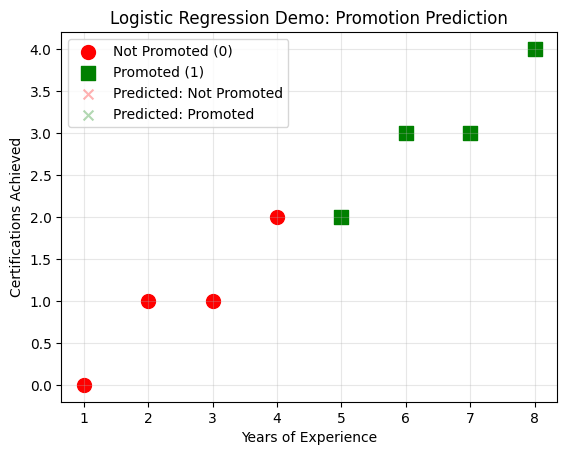

In [31]:
# 12. Visualization
import matplotlib.pyplot as plt

# Scatter plot: Years of Experience vs Certifications, colored by promotion status
plt.scatter(X_emp[y_emp == 0]["yrs_exp"], X_emp[y_emp == 0]["cert_ach"], 
            c='red', marker='o', label='Not Promoted (0)', s=100)
plt.scatter(X_emp[y_emp == 1]["yrs_exp"], X_emp[y_emp == 1]["cert_ach"], 
            c='green', marker='s', label='Promoted (1)', s=100)

# Plot predictions for visualization (using all training data)
y_pred_all = log_reg_emp.predict(X_emp)
plt.scatter(X_emp[y_pred_all == 0]["yrs_exp"], X_emp[y_pred_all == 0]["cert_ach"], 
            c='red', marker='x', alpha=0.3, s=50, label='Predicted: Not Promoted')
plt.scatter(X_emp[y_pred_all == 1]["yrs_exp"], X_emp[y_pred_all == 1]["cert_ach"], 
            c='green', marker='x', alpha=0.3, s=50, label='Predicted: Promoted')

plt.xlabel("Years of Experience")
plt.ylabel("Certifications Achieved")
plt.title("Logistic Regression Demo: Promotion Prediction")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [26]:
# 7–8. Evaluate promotion model and predict a new employee

# Predictions on test set
y_pred_emp = log_reg_emp.predict(X_test_emp)

print("Actual promotions:", list(y_test_emp))
print("Predicted promotions:", list(y_pred_emp))

acc_emp = accuracy_score(y_test_emp, y_pred_emp)
cm_emp = confusion_matrix(y_test_emp, y_pred_emp)
report_emp = classification_report(y_test_emp, y_pred_emp)

print("Accuracy (promotion model):", acc_emp)
print("Confusion matrix:\n", cm_emp)
print("Classification report:\n", report_emp)

# Predict promotion for a new employee
new_employee = pd.DataFrame([[5, 2]], columns=["YearsWorked", "Certifications"])
new_pred = log_reg_emp.predict(new_employee)
print("Predicted promotion for new employee (1 = yes, 0 = no):", new_pred[0])

Actual promotions: [0, 1]
Predicted promotions: [np.int64(0), np.int64(1)]
Accuracy (promotion model): 1.0
Confusion matrix:
 [[1 0]
 [0 1]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Predicted promotion for new employee (1 = yes, 0 = no): 1


---

## Exercise: Logistic Regression with promotion prediction

Use the same pattern you just followed (steps 1–10), but change the story:

**Question:** Will an employee get **promoted** or **not**?

- **Inputs (features)**:
  - `YearsWorked` – number of years worked in the company
  - `Certifications` – number of certifications achieved in a year
- **Output (label)**:
  - `Promotion` – 0 = No Promotion, 1 = Promotion

### Your task

1. **Create a tiny dataset** (e.g., 8–12 rows) with columns `YearsWorked`, `Certifications`, and `Promotion`.
2. Put it into a DataFrame, e.g. `employee_data`.
3. **Separate features and target**:
   - `X_emp = employee_data[["YearsWorked", "Certifications"]]`
   - `y_emp = employee_data["Promotion"]`
4. **Train/test split** using `train_test_split`.
5. **Create and train** a `LogisticRegression` model.
6. **Evaluate** using `accuracy_score`, `confusion_matrix`, and `classification_report`.
7. **Predict** promotion for a new employee (pick some values for `YearsWorked` and `Certifications`).

Try to write the code yourself by copying the structure from the study‑hours example and just changing the column names and dataset.

In [30]:
employee_data = pd.DataFrame({
    "yrs_exp":   [1, 2, 3, 4, 5, 6, 7, 8],
    "cert_ach":  [0, 1, 1, 2, 2, 3, 3, 4],
    "promotion": [0, 0, 0, 0, 1, 1, 1, 1],
})

# Separate features (X_emp) and target (y_emp)
X_emp = employee_data[["yrs_exp", "cert_ach"]]   # 2 features
y_emp = employee_data["promotion"]               # label 0/1

X_emp, y_emp

# Train/test split
from sklearn.model_selection import train_test_split

X_train_emp, X_test_emp, y_train_emp, y_test_emp = train_test_split(
    X_emp,
    y_emp,
    test_size=0.20,   # with 3 rows, this leaves 2 train / 1 test
    random_state=42,
)

X_train_emp, y_train_emp

# Create and train Logistic Regression model for promotion
from sklearn.linear_model import LogisticRegression

log_reg_emp = LogisticRegression()
log_reg_emp.fit(X_train_emp, y_train_emp)

print("Promotion model trained.")

# Evaluate and predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions on test set
y_pred_emp = log_reg_emp.predict(X_test_emp)

print("Actual promotions:", list(y_test_emp))
print("Predicted promotions:", list(y_pred_emp))

acc_emp = accuracy_score(y_test_emp, y_pred_emp)
cm_emp = confusion_matrix(y_test_emp, y_pred_emp)
report_emp = classification_report(y_test_emp, y_pred_emp)

print("Accuracy (promotion model):", acc_emp)
print("Confusion matrix:\n", cm_emp)
print("Classification report:\n", report_emp)

# Predict promotion for a new employee
new_employee = pd.DataFrame([[7, 2]], columns=["yrs_exp", "cert_ach"])
new_pred = log_reg_emp.predict(new_employee)
print("Predicted promotion for new employee (1 = yes, 0 = no):", new_pred[0])

Promotion model trained.
Actual promotions: [0, 1]
Predicted promotions: [np.int64(0), np.int64(1)]
Accuracy (promotion model): 1.0
Confusion matrix:
 [[1 0]
 [0 1]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Predicted promotion for new employee (1 = yes, 0 = no): 1
